To solving this we will use Cross Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:

1)Business understanding – What does the business need

2)Data understanding – What data do we have / need? Is it clean

3)Data preparation – How do we organize the data for modeling

4)Modeling – What modeling techniques should we apply

5)Evaluation – Which model best meets the business objectives

6)Exploratory Data Analysis





# 1)Business understanding
Indroduction:
 Amazing Zone sells various products through their portal in Brazil. In shipment process the last mile delivery is carried out by the delivery boys, which are working on the company’s payroll. These delivery personnel are many times over-loaded with the task of the deliveries, as company cannot afford to lose the customer because of bad impression at time of delivery. Due to the heavy workload, these delivery boys are not able to perform to their optimum limits on every business day, which results into their absenteeism from the work, which in turn increases the load on the other delivery personnel’s.



## **2) Data Understanding**

In [83]:
# import library
import pandas as pd
import numpy as np
!pip install --upgrade xlrd
pd.set_option('display.max_columns', None)   # to show all column of dataframe


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
# load the dataset and get the bird view of dataset
df = pd.read_csv('/content/sample_data/Absenteeism_at_work.csv', delimiter=',', quotechar='"')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"2,39,554",97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"2,39,554",97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"2,39,554",97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"2,39,554",97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"2,39,554",97,0,1,2,1,0,1,90,172,30,2


# 3) Data preparation 

In [85]:
import pandas as pd
df['Work load Average/day '] = pd.to_numeric(df['Work load Average/day '], errors='coerce')
print(df.dtypes)

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object


In [86]:
# get the dimension of the dataset
print('Dataset have {} rows and {} columns'.format(df.shape[0], df.shape[1]))

Dataset have 740 rows and 21 columns


In [87]:
# find the data type of variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            0 non-null      float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [88]:
# get the percentage of null value
percentage_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

Work load Average/day              100.0
ID                                   0.0
Disciplinary failure                 0.0
Body mass index                      0.0
Height                               0.0
Weight                               0.0
Pet                                  0.0
Social smoker                        0.0
Social drinker                       0.0
Son                                  0.0
Education                            0.0
Hit target                           0.0
Reason for absence                   0.0
Age                                  0.0
Service time                         0.0
Distance from Residence to Work      0.0
Transportation expense               0.0
Seasons                              0.0
Day of the week                      0.0
Month of absence                     0.0
Absenteeism time in hours            0.0
dtype: float64

In [89]:
## drop unnecessary column
# as ID variable is just for indexing purpose therefore we remove it from dataset

df.drop(['ID'],axis  =1, inplace = True)

In [90]:
df.apply(LabelEncoder().fit_transform)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,25,7,1,0,16,17,10,6,0,9,0,0,2,1,0,1,19,7,9,4
1,0,7,1,0,0,4,15,19,0,9,1,0,1,1,0,0,22,10,10,0
2,22,7,2,0,3,23,15,10,0,9,0,0,0,1,0,0,18,5,10,2
3,7,7,3,0,15,0,11,11,0,9,0,0,2,1,1,0,5,3,4,4
4,22,7,3,0,16,17,10,6,0,9,0,0,2,1,0,1,19,7,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,1,0,16,17,10,6,0,5,0,0,2,1,0,1,19,7,9,7
736,11,7,1,0,10,2,11,9,0,5,0,2,1,0,0,1,17,7,8,4
737,0,0,1,0,0,5,10,12,0,7,0,0,1,1,0,5,22,5,13,0
738,0,0,2,1,8,16,11,11,0,7,0,0,2,1,0,2,23,5,14,0


In [91]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder().fit_transform(df)

<740x250 sparse matrix of type '<class 'numpy.float64'>'
	with 14800 stored elements in Compressed Sparse Row format>

In [92]:

categorical_cols = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 
                    'Social drinker','Social smoker', 'Pet']


In [93]:
# change the data type of variable to a object

df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Social drinker','Social smoker', 'Pet']] =  df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Social drinker','Social smoker', 'Pet']].astype(str)

In [94]:
numerical_df =  df.select_dtypes(include=[np.number])
numerical_cols = numerical_df.columns

In [95]:
num = []       # 
for x in numerical_cols:
  num.append(x)

In [96]:
num.remove('Absenteeism time in hours')

In [97]:
df.info()  # recheck the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               740 non-null    object 
 1   Month of absence                 740 non-null    object 
 2   Day of the week                  740 non-null    object 
 3   Seasons                          740 non-null    object 
 4   Transportation expense           740 non-null    int64  
 5   Distance from Residence to Work  740 non-null    int64  
 6   Service time                     740 non-null    int64  
 7   Age                              740 non-null    int64  
 8   Work load Average/day            0 non-null      float64
 9   Hit target                       740 non-null    int64  
 10  Disciplinary failure             740 non-null    object 
 11  Education                        740 non-null    object 
 12  Son                   

In [98]:
from scipy.stats import shapiro
from termcolor import colored

for col in df[numerical_cols].columns:
    stat, p_value = shapiro(df[numerical_cols])
    alpha = 0.05
    if p_value > alpha:
        result = colored('Accepted', 'green')
    else:
        result = colored('Rejected', 'red')
    print('Feature: {} Hypothesis: {}'.format(col, result))

Feature: Transportation expense Hypothesis: Accepted
Feature: Distance from Residence to Work Hypothesis: Accepted
Feature: Service time Hypothesis: Accepted
Feature: Age Hypothesis: Accepted
Feature: Work load Average/day  Hypothesis: Accepted
Feature: Hit target Hypothesis: Accepted
Feature: Son Hypothesis: Accepted
Feature: Weight Hypothesis: Accepted
Feature: Height Hypothesis: Accepted
Feature: Body mass index Hypothesis: Accepted
Feature: Absenteeism time in hours Hypothesis: Accepted


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [99]:
## distinguish dependent and independent variable
X = df.drop(['Absenteeism time in hours'], axis = 1)    # contain independent variable
y = df['Absenteeism time in hours']              # have dependent variable

In [100]:
column = X.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X[column])
X[column] = scaler.transform(X[column])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [101]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [102]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [106]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [107]:
lr = LinearRegression( )
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

mse = MSE(y_test, prediction)
rmse = mse**.5
R2 = r2_score(y_test, prediction )
print('mse: {} \n rmse:  {} \n R2:  {}'.format(mse, rmse, R2 ))

mse: 96.06686789612729 
 rmse:  9.801370715166694 
 R2:  0.1184399091745264


In [108]:
SGD = SGDRegressor(random_state= 42)
SGD.fit(X_train, y_train)
prediction = SGD.predict(X_test)

mse = MSE(y_test, prediction)
rmse = mse**.5
R2 = r2_score(y_test, prediction)
print('mse: {} \n rmse:  {} \n R2:  {}'.format(mse, rmse, R2 ))

mse: 94.81269687971738 
 rmse:  9.737181156767978 
 R2:  0.12994884185184097


In [109]:
rf = RandomForestRegressor(random_state = 42).fit(X_train, y_train)
prediction = rf.predict(X_test)
mse = MSE(y_test, prediction)
rmse = mse**.5
R2 = r2_score(y_test, prediction )

print('mse: {} \n rmse:  {} \n R2:  {}'.format(mse, rmse, R2 ))


mse: 142.11913352305876 
 rmse:  11.921372971392966 
 R2:  -0.3041598940447596


In [110]:
grid = {'eta0': [0.03, 0.01, 0.003, 0.001, 0.0003],
              'penalty': ['l1', 'l2', 'elasticnet'],
             'alpha': [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001, 0.0003]}

## Grid Search function
from sklearn.model_selection import GridSearchCV

CV_rfr = GridSearchCV(estimator=SGDRegressor(), param_grid= grid, cv= 5, scoring='r2')
CV_rfr.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linea

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid={'alpha': [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001,
                                   0.0003],
                         'eta0': [0.03, 0.01, 0.003, 0.001, 0.0003],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='r2')

In [111]:
parameter = CV_rfr.best_params_
parameter

{'alpha': 0.01, 'eta0': 0.03, 'penalty': 'l2'}

## **Explonatory Data Analysis**

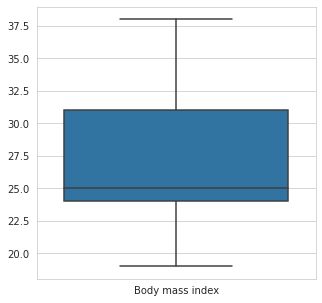

In [141]:
sns.boxplot(data=df[['Body mass index']])
fig=plt.gcf()
fig.set_size_inches(5,5)

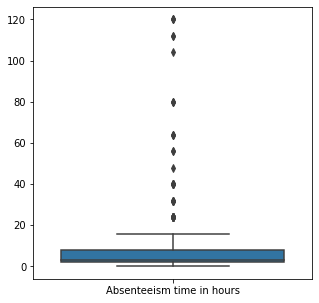

In [113]:
sns.boxplot(data=df[['Absenteeism time in hours']])
fig=plt.gcf()
fig.set_size_inches(5,5)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


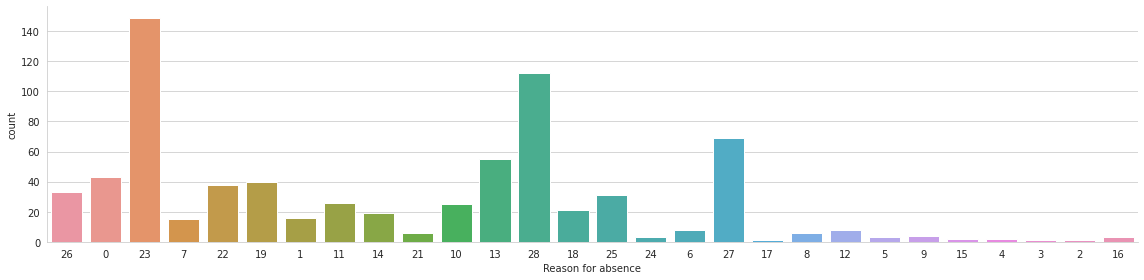

In [114]:
# Check the categorical data 
sns.set_style("whitegrid")
sns.catplot(data=df, x='Reason for absence', kind= 'count',size=4, aspect=4)



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


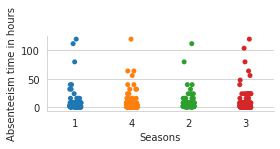

In [115]:
sns.catplot(data=df, x='Seasons',y="Absenteeism time in hours", size=2, aspect=2)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


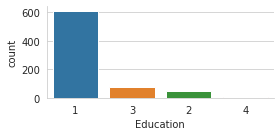

In [116]:
sns.catplot(data=df, x='Education', kind= 'count', size=2, aspect=2)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


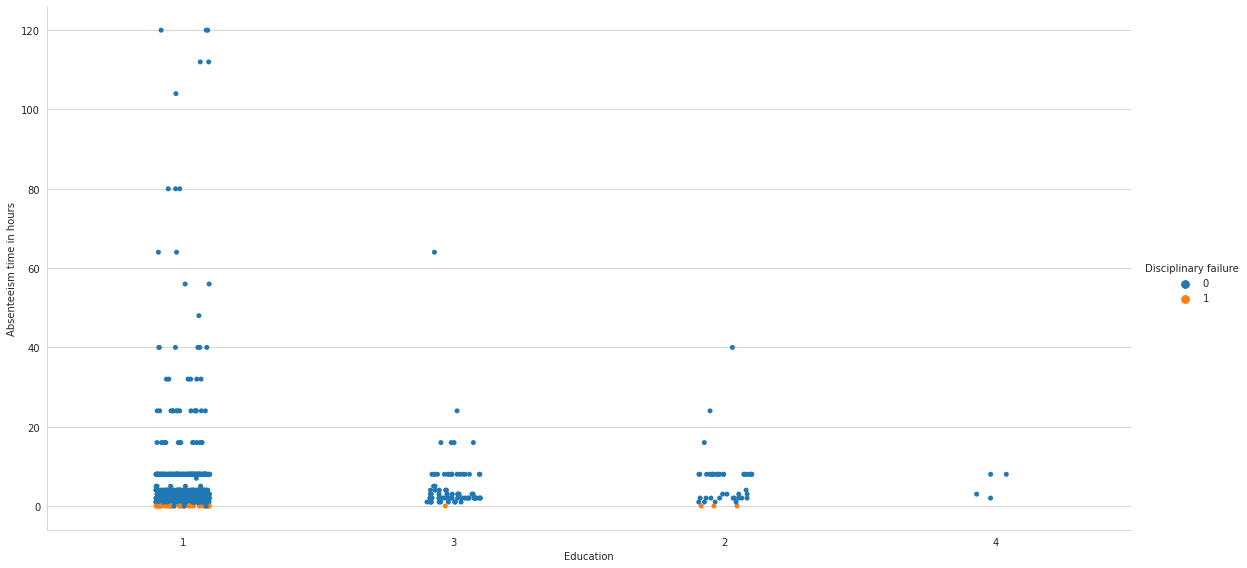

In [117]:
sns.catplot(data=df, x='Education',y="Absenteeism time in hours", hue= 'Disciplinary failure', size=8,aspect=2)

In [137]:
fig = px.histogram(df, x = 'Service time', marginal = 'box',
                    title = 'Service time Distribution', 
                   color_discrete_sequence=px.colors.qualitative.D3,
                   nbins = 100)
fig.update_traces(marker_line_width=1,marker_line_color="white")

fig.show()

In [120]:
df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,NaN,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,NaN,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,NaN,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,NaN,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,NaN,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,NaN,93,0,1,2,1,0,1,90,172,30,8
736,11,7,3,1,235,11,14,37,NaN,93,0,3,1,0,0,1,88,172,29,4
737,0,0,3,1,118,14,13,40,NaN,95,0,1,1,1,0,8,98,170,34,0
738,0,0,4,2,231,35,14,39,NaN,95,0,1,2,1,0,2,100,170,35,0


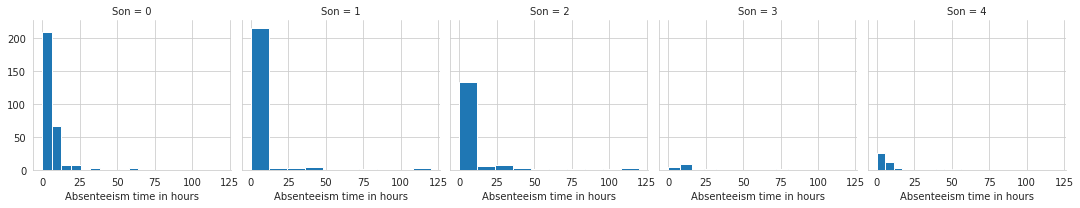

In [122]:
s = sns.FacetGrid(data=df,col='Son')
s.map(plt.hist,'Absenteeism time in hours')

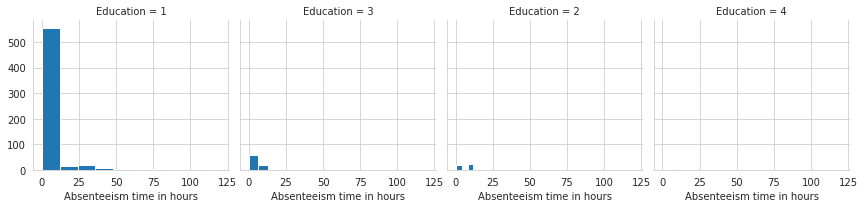

In [147]:
s = sns.FacetGrid(data=df,col='Education')
s.map(plt.hist,'Absenteeism time in hours')

In [142]:
fig = px.histogram(df, x = 'Absenteeism time in hours', marginal = 'box',
                    title = 'Time in hours', 
                   color_discrete_sequence=px.colors.qualitative.D3,
                   nbins = 100)
fig.update_traces(marker_line_width=1,marker_line_color="white")

fig.show()

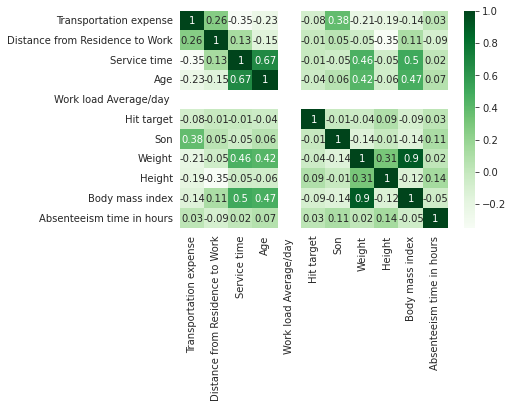

In [135]:
# checking the corellation between all the attributes
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix,cmap='Greens', annot=True)